In [1]:
import sys
# sys.path.append('/mnt/disk1/dnkhanh/gmc/gmc_code')
sys.path.append('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised')
import torch
import data_modules
from data_modules.extra import affect_dataset
from data_modules.extra.affect_dataset import AffectDataset
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
def split(labels):
    result = list()
    result.append(labels[labels <= -2.5].shape[0])
    result.append(labels[(labels > -2.5) & (labels <= -1.5)].shape[0])
    result.append(labels[(labels > -1.5) & (labels <= -0.5)].shape[0])
    result.append(labels[(labels > -0.5) & (labels <= 0.5)].shape[0])
    result.append(labels[(labels > 0.5) & (labels <= 1.5)].shape[0])
    result.append(labels[(labels > 1.5) & (labels <= 2.5)].shape[0])
    result.append(labels[labels > 2.5].shape[0])
    result = np.array(result)
    return result / result.sum()

In [3]:
ranges = [
    '[-3.0, -2.5]',
    '(-2.5, -1.5]',
    '(-1.5, -0.5]',
    '(-0.5, 0.5]',
    '(0.5, 1.5]',
    '(1.5, 2.5]',
    '(2.5, 3.0]'
]

In [14]:
mosei_train = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosei_train_a.dt')
mosei_valid = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosei_valid_a.dt')
mosei_test = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosei_test_a.dt')
print(len(mosei_train), len(mosei_valid), len(mosei_test))
train_label = np.array([sample[1].item() for sample in mosei_train])
valid_label = np.array([sample[1].item() for sample in mosei_valid])
test_label = np.array([sample[1].item() for sample in mosei_test])


16265 1869 4643


In [22]:
test_label.max(), test_label.min()

(3.0, -3.0)

In [26]:
train_label[train_label > 0.0].shape, train_label[train_label < 0.0].shape, train_label.shape

((8014,), (4721,), (16265,))

In [5]:
(ind, mod1, mod2, mod3), label = mosei_train[:][0], mosei_train[:][1]
mod1.shape, mod2.shape, mod3.shape, label.shape

(torch.Size([16265, 50, 300]),
 torch.Size([16265, 50, 74]),
 torch.Size([16265, 50, 35]),
 torch.Size([16265, 1, 1]))

In [6]:
mod11 = mod1[0]
mod11.shape, mod11

(torch.Size([50, 300]),
 tensor([[ 0.3187,  0.2496,  0.0051,  ..., -1.0889, -0.2675, -0.0122],
         [ 0.0466,  0.2132, -0.0074,  ...,  0.0091, -0.2099,  0.0539],
         [-0.4135,  0.0760,  0.0992,  ...,  0.1595, -0.1322,  0.0309],
         ...,
         [-0.0257, -0.0198, -0.3960,  ..., -0.1803, -0.0363,  0.4087],
         [ 0.1974,  0.3640,  0.0067,  ..., -0.1699,  0.0484,  0.0082],
         [ 0.3187,  0.2496,  0.0051,  ..., -1.0889, -0.2675, -0.0122]]))

In [7]:
int(label[0])

1

In [8]:
for i in range(len(mosei_train[100])):
    ele = mosei_train[100][i]
    # print(ele)
    if i==0:
        print(len(ele),ele[0])
        for j in range(len(ele)):
            if j>0:
                print('0', ele[j].shape, ele[j])
    else:
        print(i, ele)    

4 100
0 torch.Size([50, 300]) tensor([[ 0.1340,  0.9534, -0.0214,  ..., -0.1970, -0.1473, -0.1998],
        [ 0.3187,  0.2496,  0.0051,  ..., -1.0889, -0.2675, -0.0122],
        [-0.2623,  0.1263, -0.0842,  ..., -0.6686, -0.2263,  0.1499],
        ...,
        [-0.0864, -0.2276, -0.2090,  ..., -0.3607,  0.3314,  0.0322],
        [-0.2614,  0.3398, -0.0958,  ..., -0.2839, -0.1703,  0.1158],
        [ 0.3187,  0.2496,  0.0051,  ..., -1.0889, -0.2675, -0.0122]])
0 torch.Size([50, 74]) tensor([[ 1.5695e+02,  7.5000e-01,  9.0919e-02,  ..., -2.1272e-01,
         -1.2830e-01, -7.4266e-02],
        [ 1.8966e+02,  2.6316e-01,  4.4359e-02,  ..., -2.9767e-01,
         -2.3974e-01, -1.8264e-01],
        [ 1.3330e+02,  4.0000e-01,  8.3686e-02,  ..., -4.4929e-01,
         -3.5552e-01, -2.6925e-01],
        ...,
        [ 1.2500e+02,  8.1481e-01,  1.0391e-01,  ..., -2.5475e-01,
         -2.2384e-01, -1.1598e-01],
        [ 1.3127e+02,  6.0000e-01,  1.0616e-01,  ..., -3.1849e-01,
         -3.7191e-01,

In [9]:
def create_int_label(labels):
    result = [] 
    result.append(labels[labels <= -2.5].shape[0])
    result.append(labels[(labels > -2.5) & (labels <= -1.5)].shape[0])
    result.append(labels[(labels > -1.5) & (labels <= -0.5)].shape[0])
    result.append(labels[(labels > -0.5) & (labels <= 0.5)].shape[0])
    result.append(labels[(labels > 0.5) & (labels <= 1.5)].shape[0])
    result.append(labels[(labels > 1.5) & (labels <= 2.5)].shape[0])
    result.append(labels[labels > 2.5].shape[0])

In [10]:
def new_lab(x):
    result = []
    for i in x:
        result.append(round(i)+4)
    return result

In [11]:
label.shape

torch.Size([16265, 1, 1])

In [12]:
label.reshape(-1).shape

torch.Size([16265])

In [13]:
label

tensor([[[1.0000]],

        [[0.6667]],

        [[0.0000]],

        ...,

        [[0.6667]],

        [[1.0000]],

        [[1.0000]]])

In [130]:
torch.add((torch.round(label)),4)

tensor([[[5.]],

        [[5.]],

        [[4.]],

        ...,

        [[5.]],

        [[5.]],

        [[5.]]])

In [110]:
ls = [-3.0,-2.9,-2.6,-2.5,-2.4,-1.6,-1.5,-1.4,-0.6,-0.5,-0.4, 0.4,0.5,0.6, 1.4,1.5,1.6, 2.4, 2.5, 2.6, 2.9, 3]
new_lab(ls)

[1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, 7]

In [119]:
for i in ls:
    print(i, label[label==i].shape)

-3.0 torch.Size([98])
-2.9 torch.Size([0])
-2.6 torch.Size([0])
-2.5 torch.Size([0])
-2.4 torch.Size([0])
-1.6 torch.Size([0])
-1.5 torch.Size([0])
-1.4 torch.Size([0])
-0.6 torch.Size([0])
-0.5 torch.Size([2])
-0.4 torch.Size([0])
0.4 torch.Size([0])
0.5 torch.Size([7])
0.6 torch.Size([0])
1.4 torch.Size([0])
1.5 torch.Size([5])
1.6 torch.Size([0])
2.4 torch.Size([0])
2.5 torch.Size([0])
2.6 torch.Size([0])
2.9 torch.Size([0])
3 torch.Size([48])


In [113]:
round(-1.5)

-2

In [ ]:
def create_int_label(labels):
    result = [] 

In [39]:
len(mosei_train[0])

3

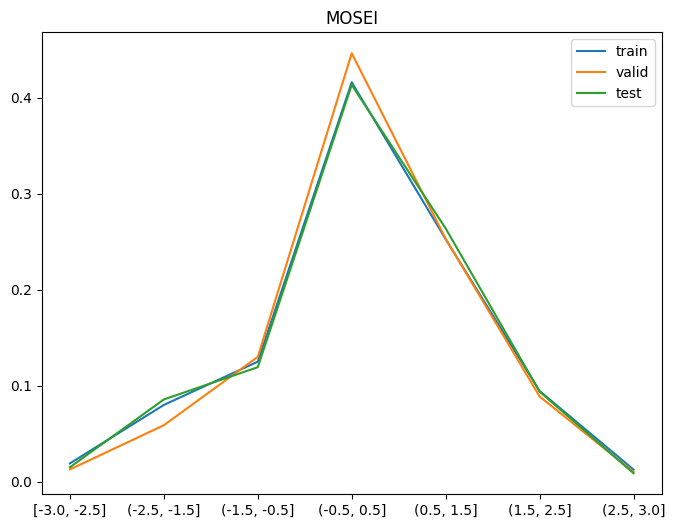

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(ranges, split(train_label), label='train')
plt.plot(ranges, split(valid_label), label='valid')
plt.plot(ranges, split(test_label), label='test')
plt.title('MOSEI')
plt.legend()
plt.show()

1284 229 686


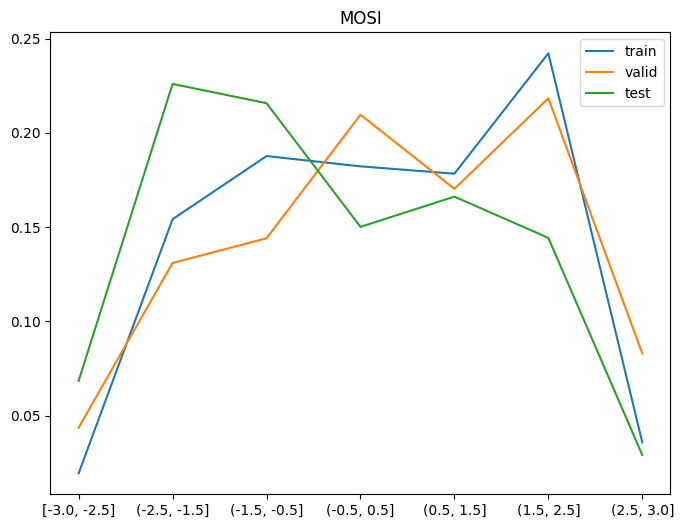

In [25]:
mosi_train = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosi_train_a.dt')
mosi_valid = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosi_valid_a.dt')
mosi_test = torch.load('/mnt/disk1/dnkhanh/Multimodal/gmc/gmc_code/supervised/dataset/mosi_test_a.dt')
print(len(mosi_train), len(mosi_valid), len(mosi_test))
train_label = np.array([sample[1].item() for sample in mosi_train])
valid_label = np.array([sample[1].item() for sample in mosi_valid])
test_label = np.array([sample[1].item() for sample in mosi_test])
plt.figure(figsize=(8, 6))
plt.plot(ranges, split(train_label), label='train')
plt.plot(ranges, split(valid_label), label='valid')
plt.plot(ranges, split(test_label), label='test')
plt.title('MOSI')
plt.legend()
plt.show()

In [ ]:
import torch

/mnt/disk1/anaconda3/envs/dnkhanh/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
a = torch.rand(size=(3, 3))
a

tensor([[0.3953, 0.3122, 0.1186],
        [0.0350, 0.3139, 0.5984],
        [0.8877, 0.4236, 0.5612]])

In [ ]:
mask = (torch.ones_like(a) - torch.eye(3)).bool()
mask

tensor([[False,  True,  True],
        [ True, False,  True],
        [ True,  True, False]])

In [ ]:
torch.masked_select(a, mask).view(3, -1)

tensor([[0.3122, 0.1186],
        [0.0350, 0.5984],
        [0.8877, 0.4236]])

In [ ]:
torch.masked_select(a, mask).view(3, -1).sum(dim=-1)

tensor([0.4307, 0.6333, 1.3114])